# Figure 2f,h

In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

import phate
import proplot as pplt
import matplotlib
import matplotlib.colors as mcolors
import scprep
import scipy
import seaborn
from scipy.stats import pearsonr
from scipy.stats import zscore
from sklearn.decomposition import PCA

pd. set_option('display.max_columns', 60)
pd. set_option('display.max_rows', 100) 

In [ ]:
#Generation of EMD heatmap Figure 2h
all_data = pd.read_csv('/....../df_gd_all.txt', sep='\t')
all_data.head()

/Users/callumnattress/opt/anaconda3/envs/phate_trellis/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3460: DtypeWarning: Columns (51,53) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,pHH3,RFP,Anti-mCherry,Vimentin,B7C23,EpCAM,B7C18,PanCK,GFP,IdU,Trail,cCaspase3,CD45,pSTAT5,pZAP_Syk,pSLP76,pBTK,pSRC,PDL1,pRB,pNDRG1,pAKT,TIGIT,CD56,CD3,pNFkB,TIM-3,CD27,CD69,pAMPKa,PD1,pH2AX,DNAM-1,p120-catenin,Beta-catenin,NKp30,pERK,Fas-L,pSTAT3,gdTCR,LAG-3,CD16,GranzymeB,cPARP,Perforin,CyclinB1,DNA_1,DNA_2,194_Cisplatin,NKp44,Date,Patient,Culture,gd_donor,Transduction,Treatment,Replicate,Time,Batch,Cell_type
0,2.112668,1.072871,1.784029,36.151936,0.732375,0.000000,1.565820,2.242769,0.000000,0.000000,3.449325,15.808734,7.545413,0.484244,1.622991,13.585954,23.493839,10.253730,3.051339,61.927704,6.037919,5.555997,17.510517,3.120044,172.314102,23.197765,0.234269,0.000000,2.445910,33.498081,0.940899,5.350353,7.302702,132.305099,21.675066,0.106663,40.808945,2.020658,2.162645,13.745032,2.528904,2.067870,16.492302,0.000000,7.492941,0.809636,1188.507935,2177.531006,21.608774,5.084100,20220608,X,gd,B,eGFP-stIL15,B7C18,A,48,Batch1,gds
1,0.527830,0.000000,0.000000,40.617779,0.000000,0.850179,0.000000,2.896378,1.821622,0.000000,0.000000,12.363726,94.904320,10.781694,12.443624,60.355770,53.698391,51.307049,1.147771,60.007214,5.578413,22.690882,12.429095,0.000000,249.278717,40.863148,4.385691,0.430424,2.954062,42.227524,2.573740,2.424393,11.418387,211.959457,31.795179,2.262900,14.396840,0.000000,9.581733,2.549168,0.764066,0.512237,10.084972,0.000000,11.921869,0.973840,1148.690063,2135.051025,11.153146,0.000000,20220608,X,gd,B,eGFP-stIL15,B7C18,A,48,Batch1,gds
2,0.000000,0.272097,1.360897,12.533136,0.000000,0.000000,0.000000,2.684406,4.605258,0.000000,0.000000,69.111595,78.055313,0.000000,0.000000,3.013540,54.984116,12.758614,0.905969,0.000000,1.819490,0.000000,5.411917,0.000000,234.678146,9.723784,3.305206,6.483822,4.072320,28.807552,0.386954,2.221904,0.000000,16.533901,83.216873,0.000000,8.262188,1.027620,1.759348,9.905869,0.000000,0.000000,12.013611,12.136374,11.801295,1.850765,1070.468506,1976.926392,16.781635,0.542236,20220608,X,gd,B,eGFP-stIL15,B7C18,A,48,Batch1,gds
3,0.000000,0.052713,0.000000,33.661613,0.000000,0.317290,0.000000,0.166774,1.022511,0.857797,0.000000,12.005932,38.411808,2.619150,0.174478,8.227551,28.066032,20.863403,0.000000,44.467892,0.809206,9.240581,15.271775,1.525572,168.543442,33.865623,0.000000,7.686261,0.000000,38.135387,0.000000,2.225263,0.888110,123.516968,17.426126,0.572136,25.417891,0.000000,2.044804,3.667158,2.677844,0.610078,24.022224,3.468787,16.100355,4.137844,833.138000,1527.750000,15.340094,1.247573,20220608,X,gd,B,eGFP-stIL15,B7C18,A,48,Batch1,gds
4,0.000000,0.425003,0.033936,72.471931,1.903905,3.386223,0.391445,0.000000,4.443120,0.000000,0.000000,61.478252,99.313812,3.002901,0.677532,10.290436,32.765141,31.240295,0.907393,38.185310,3.654915,26.866573,14.178667,0.000000,174.524155,53.488743,1.074959,2.647377,1.578681,23.625860,0.000000,1.547652,0.906195,150.692383,39.870945,0.000000,35.415035,0.019462,6.027297,6.952862,2.204513,2.269700,8.026061,0.000000,7.649633,9.150639,972.849915,1659.628662,3.891569,0.850994,20220608,X,gd,B,eGFP-stIL15,B7C18,A,48,Batch1,gds
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819340,3.357316,0.000000,0.000000,30.944431,1.578278,4.320772,0.209392,2.607019,1.500951,826.765747,0.000000,16.769331,181.358490,1.952625,28.016953,0.000000,7.833639,20.198891,1.138615,42.455948,7.152562,0.905693,26.804211,12.240554,904.377502,33.007812,3.237805,0.869414,4.508156,25.763971,0.519497,11.010099,24.943974,133.471329,21.747068,0.000000,20.992437,0.000000,13.945458,16.602606,2.728806,19.485020,186.508606,7.385914,4.425802,10.664576,1601.611450,2732.432861,31.009453,1.381068,20230209,X,gd,E,NT,IL15,C,48,Batch9,gds
5819341,0.000000,0.000000,0.000000,25.492655,1.366826,0.000000,0.807238,0.000000,0.845823,1.745316,0.000000,43.865810,73.141312,0.422409,5.922387,0.000000,9.262834,46.660622,0.000

In [5]:
pre_data = all_data.drop([

 'RFP',
 'Anti-mCherry',
 'EpCAM',
 'PanCK',
    'DNA_1',
    'DNA_2',
    '194_Cisplatin',
    'Date',
    'Patient',
    'Culture',
    'Transduction',
    'Treatment',
    'Replicate',
    'Time',
    'Cell_type',
    'gd_donor',
    'Batch',    
    
],axis=1, inplace=False)
pre_data

,pHH3,Vimentin,B7C23,B7C18,GFP,IdU,Trail,cCaspase3,CD45,pSTAT5,pZAP_Syk,pSLP76,pBTK,pSRC,PDL1,pRB,pNDRG1,pAKT,TIGIT,CD56,CD3,pNFkB,TIM-3,CD27,CD69,pAMPKa,PD1,pH2AX,DNAM-1,p120-catenin,Beta-catenin,NKp30,pERK,Fas-L,pSTAT3,gdTCR,LAG-3,CD16,GranzymeB,cPARP,Perforin,CyclinB1,NKp44
0,2.112668,36.151936,0.732375,1.565820,0.000000,0.000000,3.449325,15.808734,7.545413,0.484244,1.622991,13.585954,23.493839,10.253730,3.051339,61.927704,6.037919,5.555997,17.510517,3.120044,172.314102,23.197765,0.234269,0.000000,2.445910,33.498081,0.940899,5.350353,7.302702,132.305099,21.675066,0.106663,40.808945,2.020658,2.162645,13.745032,2.528904,2.067870,16.492302,0.000000,7.492941,0.809636,5.084100
1,0.527830,40.617779,0.000000,0.000000,1.821622,0.000000,0.000000,12.363726,94.904320,10.781694,12.443624,60.355770,53.698391,51.307049,1.147771,60.007214,5.578413,22.690882,12.429095,0.000000,249.278717,40.863148,4.385691,0.430424,2.954062,42.227524,2.573740,2.424393,11.418387,211.959457,31.795179,2.262900,14.396840,0.000000,9.581733,2.549168,0.764066,0.512237,10.084972,0.000000,11.921869,0.973840,0.000000
2,0.000000,12.533136,0.000000,0.000000,4.605258,0.000000,0.000000,69.111595,78.055313,0.000000,0.000000,3.013540,54.984116,12.758614,0.905969,0.000000,1.819490,0.000000,5.411917,0.000000,234.678146,9.723784,3.305206,6.483822,4.072320,28.807552,0.386954,2.221904,0.000000,16.533901,83.216873,0.000000,8.262188,1.027620,1.759348,9.905869,0.000000,0.000000,12.013611,12.136374,11.801295,1.850765,0.542236
3,0.000000,33.661613,0.000000,0.000000,1.022511,0.857797,0.000000,12.005932,38.411808,2.619150,0.174478,8.227551,28.066032,20.863403,0.000000,44.467892,0.809206,9.240581,15.271775,1.525572,168.543442,33.865623,0.000000,7.686261,0.000000,38.135387,0.000000,2.225263,0.888110,123.516968,17.426126,0.572136,25.417891,0.000000,2.044804,3.667158,2.677844,0.610078,24.022224,3.468787,16.100355,4.137844,1.247573
4,0.000000,72.471931,1.903905,0.391445,4.443120,0.000000,0.000000,61.478252,99.313812,3.002901,0.677532,10.290436,32.765141,31.240295,0.907393,38.185310,3.654915,26.866573,14.178667,0.000000,174.524155,53.488743,1.074959,2.647377,1.578681,23.625860,0.000000,1.547652,0.906195,150.692383,39.870945,0.000000,35.415035,0.019462,6.027297,6.952862,2.204513,2.269700,8.026061,0.000000,7.649633,9.150639,0.850994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819340,3.357316,30.944431,1.578278,0.209392,1.500951,826.765747,0.000000,16.769331,181.358490,1.952625,28.016953,0.000000,7.833639,20.198891,1.138615,42.455948,7.152562,0.905693,26.804211,12.240554,904.377502,33.007812,3.237805,0.869414,4.508156,25.763971,0.519497,11.010099,24.943974,133.471329,21.747068,0.000000,20.992437,0.000000,13.945458,16.602606,2.728806,19.485020,186.508606,7.385914,4.425802,10.664576,1.381068
5819341,0.000000,25.492655,1.366826,0.807238,0.845823,1.745316,0.000000,43.865810,73.141312,0.422409,5.922387,0.000000,9.262834,46.660622,0.000000,44.193893,14.579997,11.834751,30.874540,2.222952,593.606873,33.942799,0.000000,5.484707,1.107356,41.650654,4.079612,2.890662,16.442080,211.754593,41.139343,0.167057,21.065989,0.932406,52.263050,7.510569,4.690210,4.869834,318.626892,14.122758,0.000000,2.388915,0.000000
5819342,0.000000,24.976599,8.353419,0.000000,0.471833,0.000000,0.000000,20.350275,66.372398,6.817601,2.872206,0.000000,10.188087,13.935201,0.000000,27.215403,0.000000,5.833886,1.988676,0.000000,265.788788,49.861317,4.957391,1.605252,0.000000,29.015533,13.465952,0.000000,7.995706,114.426605,14.433770,0.581513,22.458857,1.111541,3.334839,6.933015,1.609262,11.135314,24.247538,4.874505,0.187084,1.576167,2.325908
5819343,2.175176,31.664440,1.766799,7.169693,2.741029,0.000000,0.000000,46.702705,63.867626,25.045683,5.710142,3091.138916,22.184875,51.588818,0.000000,60.380390,22.572739,18.771585,6.463361,2.874717,327.258179,53.740910,5.749938,13.937111,3.208147,60.760220,0.0000

In [6]:
metadata = all_data.filter(['Date','Patient','Culture','gd_donor','Transduction','Treatment','Replicate','Time','Batch','Cell_type'])
metadata['Batch'] = metadata['Batch'].apply(str)
metadata['gd_donor'] = metadata['gd_donor'].apply(str)
metadata['Patient'] = metadata['Patient'].apply(str)
metadata['Treatment'] = metadata['Treatment'].apply(str)
metadata['Transduction'] = metadata['Transduction'].apply(str)
metadata  

,Date,Patient,Culture,gd_donor,Transduction,Treatment,Replicate,Time,Batch,Cell_type
0,20220608,X,gd,B,eGFP-stIL15,B7C18,A,48,Batch1,gds
1,20220608,X,gd,B,eGFP-stIL15,B7C18,A,48,Batch1,gds
2,20220608,X,gd,B,eGFP-stIL15,B7C18,A,48,Batch1,gds
3,20220608,X,gd,B,eGFP-stIL15,B7C18,A,48,Batch1,gds
4,20220608,X,gd,B,eGFP-stIL15,B7C18,A,48,Batch1,gds
...,...,...,...,...,...,...,...,...,...,...
5819340,20230209,X,gd,E,NT,IL15,C,48,Batch9,gds
5819341,20230209,X,gd,E,NT,IL15,C,48,Batch9,gds
5819342,20230209,X,gd,E,NT,IL15,C,48,Batch9,gds
5819343,20230209,X,gd,E,NT,IL15,C,48,Batch9,gds


In [7]:
#Select eGFP-stIL15 / ABE7 / wt PDO / BM / B7C18
subset_pre_data = pre_data.loc[(metadata['Patient'].isin(['X','27'])) & (metadata['gd_donor'].isin(['A','B','C','D','E','F','7'])) 
& (metadata['Transduction'].isin(['eGFP-stIL15'])) & (metadata['Treatment'].isin(['BM','B7C18'])) & (metadata['Batch'].isin(['Batch2']))]
subset_pre_data


,pHH3,Vimentin,B7C23,B7C18,GFP,IdU,Trail,cCaspase3,CD45,pSTAT5,pZAP_Syk,pSLP76,pBTK,pSRC,PDL1,pRB,pNDRG1,pAKT,TIGIT,CD56,CD3,pNFkB,TIM-3,CD27,CD69,pAMPKa,PD1,pH2AX,DNAM-1,p120-catenin,Beta-catenin,NKp30,pERK,Fas-L,pSTAT3,gdTCR,LAG-3,CD16,GranzymeB,cPARP,Perforin,CyclinB1,NKp44
477202,0.000000,34.707291,0.000000,0.0,0.000000,0.000000,0.000000,21.658829,472.923370,23.141352,8.601446,22.103407,31.870472,47.424408,0.018484,12.103301,7.392933,11.060347,24.470173,35.526260,1161.258667,30.991314,0.000000,12.368027,16.073236,53.671825,0.000000,6.008776,22.241764,240.674149,87.260948,5.924499,3.945853,0.000000,5.440267,35.751488,8.804577,4.400812,29.169230,5.635969,7.820054,21.629023,0.000000
477203,0.000000,14.157574,0.000000,0.0,0.000000,0.000000,0.000000,13.882650,296.851440,16.756283,12.612571,3.255828,12.925344,26.254704,0.000000,23.200035,0.000000,13.703773,1.997243,24.343845,792.608154,9.255106,0.000000,7.052355,6.512354,27.114666,0.000000,0.110017,2.845665,224.595200,59.615730,11.540479,19.132288,0.000000,7.207807,6.978939,0.000000,0.000000,18.350615,0.000000,5.480089,6.748727,0.000000
477204,0.000000,462.014740,1.668110,0.0,1.507814,3.138901,0.000000,11.260657,101.655289,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.334311,0.000000,0.000000,1.588589,4.981578,216.276596,2.870738,0.000000,0.000000,10.847421,5.684055,0.000000,5.039053,12.555069,141.495621,20.588900,0.000000,0.000000,0.000000,0.271760,13.388305,6.980832,0.000000,26.652905,2.816440,6.579736,8.827875,2.147535
477205,0.000000,22.172516,1.283391,0.0,0.812709,0.438123,0.000000,18.864975,200.602661,7.845024,5.418871,23.692860,7.627847,17.806017,3.561880,20.336231,0.000000,9.560737,5.191366,0.000000,637.622314,6.697829,0.000000,34.707542,3.337770,4.039658,0.000000,0.000000,12.394520,162.817825,18.507847,0.000000,0.000000,0.000000,11.461474,18.406147,0.000000,4.399421,18.399115,0.000000,8.413734,3.453521,4.314132
477206,0.000000,23.359049,0.000000,0.0,0.000000,0.000000,0.251297,2.745977,81.909645,0.000000,0.000000,0.000000,8.400867,10.778749,3.622564,20.252939,0.000000,1.076861,68.665955,21.521221,294.875244,13.426810,0.000000,3.656691,4.978725,16.354219,0.000000,0.000000,1.353185,109.419586,10.813177,0.000000,6.957262,0.000000,0.000000,4.159170,0.000000,12.133100,10.652521,0.000000,0.000000,1.877119,0.183443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1807683,0.000000,15.963036,0.000000,0.0,0.000000,0.000000,0.551330,28.487806,349.113464,15.521182,32.310143,37.777279,37.189461,42.824638,4.246328,55.498966,9.720228,23.407068,10.369532,8.321938,900.821594,31.123848,2.652231,4.834708,9.242570,46.306736,0.000000,3.650981,10.763973,425.093384,85.770912,6.922042,22.585400,0.000000,12.628499,27.026968,15.712010,3.156244,75.020470,4.703169,14.151403,11.018835,0.000000
1807684,0.000000,26.493465,0.000000,0.0,0.914119,0.000000,0.000000,13.426558,256.109924,7.560642,2.176643,37.044231,23.599537,18.752083,1.943261,15.744697,4.362847,3.686054,11.141434,0.000000,867.399597,25.698963,4.642466,9.400679,10.741580,18.002834,0.000000,2.648323,14.240260,80.668503,38.367813,0.000000,7.453820,0.000000,3.085247,42.151684,4.788229,5.305407,49.064571,1.441029,3.165240,13.645665,0.000000
1807685,1.903699,16.854084,0.000000,0.0,7.067545,0.000000,0.198118,29.392664,480.997864,2.698242,1.571482,13.060966,8.088861,29.516277,3.830591,35.170734,5.781121,9.179384,14.584671,3.747824,733.334656,27.119640,0.172128,3.120813,5.704329,33.320511,1.482522,10.748447,18.426777,421.612915,86.438835,2.222527,10.495743,0.000000,15.634960,20.387915,8.525188,2.544123,175.288040,11.783825,11.113203,21.844549,0.000000
1807686,0.867141,67.183662,0.000000,0.0,18.845470,1.491585,0.000000,8.966202,214.761322,4.189246,3.378724,16.235182,11.717817,32.288960,3.427463,29.309772,0.000000,15.379817,9.241663,0.000000,437.943390,16.428036,0.000000,7.792305,15.744081,38.888210,3.096179,9.67323

In [8]:
subset_metadata = metadata.loc[(metadata['Patient'].isin(['X','27'])) & (metadata['gd_donor'].isin(['A','B','C','D','E','F','7'])) 
& (metadata['Transduction'].isin(['eGFP-stIL15'])) & (metadata['Treatment'].isin(['BM','B7C18'])) & (metadata['Batch'].isin(['Batch2']))]
subset_metadata

,Date,Patient,Culture,gd_donor,Transduction,Treatment,Replicate,Time,Batch,Cell_type
477202,20220614,X,gd,7,eGFP-stIL15,B7C18,A,48,Batch2,gds
477203,20220614,X,gd,7,eGFP-stIL15,B7C18,A,48,Batch2,gds
477204,20220614,X,gd,7,eGFP-stIL15,B7C18,A,48,Batch2,gds
477205,20220614,X,gd,7,eGFP-stIL15,B7C18,A,48,Batch2,gds
477206,20220614,X,gd,7,eGFP-stIL15,B7C18,A,48,Batch2,gds
...,...,...,...,...,...,...,...,...,...,...
1807683,20220614,27,PDOgd,F,eGFP-stIL15,BM,C,48,Batch2,gds
1807684,20220614,27,PDOgd,F,eGFP-stIL15,BM,C,48,Batch2,gds
1807685,20220614,27,PDOgd,F,eGFP-stIL15,BM,C,48,Batch2,gds
1807686,20220614,27,PDOgd,F,eGFP-stIL15,BM,C,48,Batch2,gds


In [9]:
as_data = np.arcsinh(subset_pre_data/5)
as_data

,pHH3,Vimentin,B7C23,B7C18,GFP,IdU,Trail,cCaspase3,CD45,pSTAT5,pZAP_Syk,pSLP76,pBTK,pSRC,PDL1,pRB,pNDRG1,pAKT,TIGIT,CD56,CD3,pNFkB,TIM-3,CD27,CD69,pAMPKa,PD1,pH2AX,DNAM-1,p120-catenin,Beta-catenin,NKp30,pERK,Fas-L,pSTAT3,gdTCR,LAG-3,CD16,GranzymeB,cPARP,Perforin,CyclinB1,NKp44
477202,0.000000,2.635808,0.000000,0.0,0.000000,0.000000,0.000000,2.172187,5.242671,2.236802,1.311062,2.191995,2.551486,2.945614,0.003697,1.617355,1.182826,1.534643,2.291442,2.658897,6.140974,2.523861,0.000000,1.637384,1.884223,3.068760,0.000000,1.017096,2.198082,4.567261,3.553432,1.006270,0.724190,0.000000,0.942287,2.665155,1.331301,0.794049,2.464090,0.968516,1.229753,2.170845,0.000000
477203,0.000000,1.763776,0.000000,0.0,0.000000,0.000000,0.000000,1.745306,4.777012,1.924034,1.655560,0.612201,1.678370,2.360501,0.000000,2.239278,0.000000,1.733113,0.389523,2.286372,5.759048,1.374954,0.000000,1.144053,1.079957,2.392179,0.000000,0.022002,0.542177,4.498133,3.173383,1.573502,2.051740,0.000000,1.161904,1.135531,0.000000,0.000000,2.011436,0.000000,0.947666,1.108421,0.000000
477204,0.000000,5.219335,0.327724,0.0,0.297170,0.592500,0.000000,1.551023,3.705901,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.058084,0.000000,0.000000,0.312602,0.878766,4.460401,0.546531,0.000000,0.000000,1.516960,0.974883,0.000000,0.886886,1.651314,4.036290,2.122890,0.000000,0.000000,0.000000,0.054325,1.711265,1.135752,0.000000,2.375292,0.537091,1.088137,1.333599,0.417291
477205,0.000000,2.195040,0.253940,0.0,0.161834,0.087513,0.000000,2.038133,4.385191,1.232441,0.939388,2.259835,1.208863,1.982400,0.662776,2.110894,0.000000,1.403642,0.908180,0.000000,5.541471,1.102346,0.000000,2.635815,0.625883,0.738850,0.000000,0.000000,1.639368,4.176577,2.019670,0.000000,0.000000,0.000000,1.567202,2.014352,0.000000,0.793840,2.013983,0.000000,1.292040,0.645034,0.780979
477206,0.000000,2.245956,0.000000,0.0,0.000000,0.000000,0.050238,0.524775,3.490256,0.000000,0.000000,0.000000,1.290724,1.511196,0.672633,2.106909,0.000000,0.213741,3.314286,2.165978,4.770334,1.713956,0.000000,0.678151,0.878362,1.900784,0.000000,0.000000,0.267438,3.779421,1.514089,0.000000,1.133004,0.000000,0.000000,0.757334,0.000000,1.619628,1.500521,0.000000,0.000000,0.367121,0.036680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1807683,0.000000,1.877656,0.000000,0.0,0.000000,0.000000,0.110044,2.440799,4.939158,1.850903,2.565024,2.719768,2.704223,2.844214,0.770678,3.102097,1.418328,2.247964,1.476207,1.282622,5.887024,2.528074,0.508277,0.857803,1.373761,2.921899,0.000000,0.677229,1.509951,5.136053,3.536238,1.128886,2.213046,0.000000,1.656734,2.388993,1.862541,0.595435,3.402579,0.838766,1.763365,1.531218,0.000000
1807684,0.000000,2.369395,0.000000,0.0,0.181820,0.000000,0.000000,1.713938,4.629411,1.201472,0.422634,2.700346,2.255974,2.032332,0.379479,1.864522,0.788338,0.682884,1.541304,0.000000,5.849217,2.339492,0.829896,1.388709,1.508063,1.992987,0.000000,0.507586,1.769269,3.475017,2.735147,0.000000,1.189629,0.000000,0.583390,2.828483,0.851105,0.923912,2.979433,0.284358,0.596956,1.729122,0.000000
1807685,0.372094,1.929612,0.000000,0.0,1.145809,0.000000,0.039613,2.471612,5.259599,0.516391,0.309339,1.688111,1.258365,2.475749,0.705992,2.648938,0.987644,1.367733,1.791846,0.692799,5.681323,2.392359,0.034419,0.589433,0.977559,2.595465,0.292323,1.508642,2.015433,5.127832,3.543982,0.431034,1.487117,0.000000,1.857858,2.113359,1.303372,0.489091,4.250343,1.592680,1.538989,2.180508,0.000000
1807686,0.172570,3.292521,0.000000,0.0,2.037133,0.294061,0.000000,1.347153,4.453372,0.761951,0.632683,1.893800,1.587511,2.564376,0.640741,2.468827,0.000000,1.842198,1.373675,0.000000,5.165832,1.905092,0.000000,1.226760,1.864484,2.748508,0.585249,1.414021,0.224146,4.561614,3.399778,0.012265,0.924737,0.000000,1.650847,1.686944,1.232778,1.540934,1.284239,0.000000,0.121625,1.254951,0.000000


In [10]:
as_data_centered = scprep.normalize.batch_mean_center(as_data,sample_idx=subset_metadata['Batch'])
as_data_centered

,pHH3,Vimentin,B7C23,B7C18,GFP,IdU,Trail,cCaspase3,CD45,pSTAT5,pZAP_Syk,pSLP76,pBTK,pSRC,PDL1,pRB,pNDRG1,pAKT,TIGIT,CD56,CD3,pNFkB,TIM-3,CD27,CD69,pAMPKa,PD1,pH2AX,DNAM-1,p120-catenin,Beta-catenin,NKp30,pERK,Fas-L,pSTAT3,gdTCR,LAG-3,CD16,GranzymeB,cPARP,Perforin,CyclinB1,NKp44
477202,-0.142367,0.391147,-0.227865,-0.165992,-0.563242,-1.540719,-0.098900,0.417443,0.994437,1.248755,0.331206,0.569461,0.707683,0.846005,-0.409618,-0.882155,0.608882,0.324459,0.639850,1.786925,0.714859,0.271637,-0.548716,0.934935,0.788007,0.747448,-0.247434,-0.135434,1.157681,0.059662,0.510861,0.683793,-0.880297,-0.210287,-0.096407,0.664276,0.401739,-0.079209,-0.437105,0.179059,0.297011,0.780474,-0.313405
477203,-0.142367,-0.480885,-0.227865,-0.165992,-0.563242,-1.540719,-0.098900,-0.009438,0.528779,0.935987,0.675704,-1.010332,-0.165434,0.260891,-0.413315,-0.260233,-0.573944,0.522929,-1.262069,1.414400,0.332933,-0.877270,-0.548716,0.441605,-0.016260,0.070866,-0.247434,-1.130528,-0.498224,-0.009466,0.130811,1.251025,0.447253,-0.210287,0.123210,-0.865349,-0.929562,-0.873258,-0.889759,-0.789458,0.014923,-0.281951,-0.313405
477204,-0.142367,2.974674,0.099859,-0.165992,-0.266073,-0.948219,-0.098900,-0.203720,-0.542332,-0.988047,-0.979856,-1.622534,-1.843804,-2.099609,-0.413315,-1.441427,-0.573944,-1.210184,-1.338991,0.006794,-0.965714,-1.705693,-0.548716,-0.702448,0.420744,-1.346429,-0.247434,-0.265644,0.610912,-0.471309,-0.919682,-0.322477,-1.604487,-0.210287,-0.984369,-0.289615,0.206190,-0.873258,-0.525903,-0.252367,0.155394,-0.056772,0.103885
477205,-0.142367,-0.049621,0.026075,-0.165992,-0.401408,-1.453206,-0.098900,0.283389,0.136957,0.244393,-0.040468,0.637301,-0.634940,-0.117209,0.249461,-0.388616,-0.573944,0.193457,-0.743413,-0.871972,0.115356,-1.149878,-0.548716,1.933366,-0.470333,-1.582463,-0.247434,-1.152530,0.598966,-0.331022,-1.022901,-0.322477,-1.604487,-0.210287,0.528508,0.013472,-0.929562,-0.079418,-0.887212,-0.789458,0.359297,-0.745337,0.467574
477206,-0.142367,0.001295,-0.227865,-0.165992,-0.563242,-1.540719,-0.048662,-1.229968,-0.757977,-0.988047,-0.979856,-1.622534,-0.553079,-0.588414,0.259317,-0.392601,-0.573944,-0.996444,1.662693,1.294006,-0.655782,-0.538268,-0.548716,-0.024298,-0.217855,-0.420528,-0.247434,-1.152530,-0.772964,-0.728178,-1.528482,-0.322477,-0.471483,-0.210287,-1.038694,-1.243546,-0.929562,0.746370,-1.400674,-0.789458,-0.932743,-1.023250,-0.276725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1807683,-0.142367,-0.367005,-0.227865,-0.165992,-0.563242,-1.540719,0.011144,0.686056,0.690924,0.862856,1.585168,1.097234,0.860420,0.744604,0.357362,0.602586,0.844384,1.037780,-0.175385,0.410651,0.460909,0.275850,-0.040439,0.155355,0.277545,0.600586,-0.247434,-0.475301,0.469550,0.628454,0.493666,0.806409,0.608560,-0.210287,0.618040,0.388113,0.932980,-0.277823,0.501384,0.049309,0.830622,0.140847,-0.313405
1807684,-0.142367,0.124734,-0.227865,-0.165992,-0.381422,-1.540719,-0.098900,-0.040806,0.381178,0.213425,-0.557222,1.077812,0.412171,-0.067277,-0.033837,-0.634989,0.214395,-0.527300,-0.110289,-0.871972,0.423102,0.087268,0.281180,0.686260,0.411847,-0.328325,-0.247434,-0.644944,0.728867,-1.032582,-0.307424,-0.322477,-0.414857,-0.210287,-0.455304,0.827603,-0.078456,0.050654,0.078238,-0.505100,-0.335787,0.338751,-0.313405
1807685,0.229727,-0.315049,-0.227865,-0.165992,0.582566,-1.540719,-0.059287,0.716868,1.011366,-0.471657,-0.670517,0.065577,-0.585438,0.376140,0.292677,0.149428,0.413700,0.157548,0.140254,-0.179173,0.255208,0.140135,-0.514297,-0.113015,-0.118657,0.274152,0.044889,0.356112,0.975031,0.620233,0.501410,0.108557,-0.117370,-0.210287,0.819164,0.112479,0.373810,-0.384167,1.349149,0.803222,0.606247,0.790137,-0.313405
1807686,0.030204,1.047860,-0.227865,-0.165992,1.473890,-1.246658,-0.098900,-0.407590,0.205139,-0.226096,-0.347173,0.271266,-0.256292,0.464767,0.227426,-0.030683,-0.573944,0.632014,-0.2779

In [11]:
data_as_meta = pd.concat([as_data_centered, subset_metadata], axis=1)
data_as_meta

,pHH3,Vimentin,B7C23,B7C18,GFP,IdU,Trail,cCaspase3,CD45,pSTAT5,pZAP_Syk,pSLP76,pBTK,pSRC,PDL1,pRB,pNDRG1,pAKT,TIGIT,CD56,CD3,pNFkB,TIM-3,CD27,CD69,pAMPKa,PD1,pH2AX,DNAM-1,p120-catenin,Beta-catenin,NKp30,pERK,Fas-L,pSTAT3,gdTCR,LAG-3,CD16,GranzymeB,cPARP,Perforin,CyclinB1,NKp44,Date,Patient,Culture,gd_donor,Transduction,Treatment,Replicate,Time,Batch,Cell_type
477202,-0.142367,0.391147,-0.227865,-0.165992,-0.563242,-1.540719,-0.098900,0.417443,0.994437,1.248755,0.331206,0.569461,0.707683,0.846005,-0.409618,-0.882155,0.608882,0.324459,0.639850,1.786925,0.714859,0.271637,-0.548716,0.934935,0.788007,0.747448,-0.247434,-0.135434,1.157681,0.059662,0.510861,0.683793,-0.880297,-0.210287,-0.096407,0.664276,0.401739,-0.079209,-0.437105,0.179059,0.297011,0.780474,-0.313405,20220614,X,gd,7,eGFP-stIL15,B7C18,A,48,Batch2,gds
477203,-0.142367,-0.480885,-0.227865,-0.165992,-0.563242,-1.540719,-0.098900,-0.009438,0.528779,0.935987,0.675704,-1.010332,-0.165434,0.260891,-0.413315,-0.260233,-0.573944,0.522929,-1.262069,1.414400,0.332933,-0.877270,-0.548716,0.441605,-0.016260,0.070866,-0.247434,-1.130528,-0.498224,-0.009466,0.130811,1.251025,0.447253,-0.210287,0.123210,-0.865349,-0.929562,-0.873258,-0.889759,-0.789458,0.014923,-0.281951,-0.313405,20220614,X,gd,7,eGFP-stIL15,B7C18,A,48,Batch2,gds
477204,-0.142367,2.974674,0.099859,-0.165992,-0.266073,-0.948219,-0.098900,-0.203720,-0.542332,-0.988047,-0.979856,-1.622534,-1.843804,-2.099609,-0.413315,-1.441427,-0.573944,-1.210184,-1.338991,0.006794,-0.965714,-1.705693,-0.548716,-0.702448,0.420744,-1.346429,-0.247434,-0.265644,0.610912,-0.471309,-0.919682,-0.322477,-1.604487,-0.210287,-0.984369,-0.289615,0.206190,-0.873258,-0.525903,-0.252367,0.155394,-0.056772,0.103885,20220614,X,gd,7,eGFP-stIL15,B7C18,A,48,Batch2,gds
477205,-0.142367,-0.049621,0.026075,-0.165992,-0.401408,-1.453206,-0.098900,0.283389,0.136957,0.244393,-0.040468,0.637301,-0.634940,-0.117209,0.249461,-0.388616,-0.573944,0.193457,-0.743413,-0.871972,0.115356,-1.149878,-0.548716,1.933366,-0.470333,-1.582463,-0.247434,-1.152530,0.598966,-0.331022,-1.022901,-0.322477,-1.604487,-0.210287,0.528508,0.013472,-0.929562,-0.079418,-0.887212,-0.789458,0.359297,-0.745337,0.467574,20220614,X,gd,7,eGFP-stIL15,B7C18,A,48,Batch2,gds
477206,-0.142367,0.001295,-0.227865,-0.165992,-0.563242,-1.540719,-0.048662,-1.229968,-0.757977,-0.988047,-0.979856,-1.622534,-0.553079,-0.588414,0.259317,-0.392601,-0.573944,-0.996444,1.662693,1.294006,-0.655782,-0.538268,-0.548716,-0.024298,-0.217855,-0.420528,-0.247434,-1.152530,-0.772964,-0.728178,-1.528482,-0.322477,-0.471483,-0.210287,-1.038694,-1.243546,-0.929562,0.746370,-1.400674,-0.789458,-0.932743,-1.023250,-0.276725,20220614,X,gd,7,eGFP-stIL15,B7C18,A,48,Batch2,gds
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1807683,-0.142367,-0.367005,-0.227865,-0.165992,-0.563242,-1.540719,0.011144,0.686056,0.690924,0.862856,1.585168,1.097234,0.860420,0.744604,0.357362,0.602586,0.844384,1.037780,-0.175385,0.410651,0.460909,0.275850,-0.040439,0.155355,0.277545,0.600586,-0.247434,-0.475301,0.469550,0.628454,0.493666,0.806409,0.608560,-0.210287,0.618040,0.388113,0.932980,-0.277823,0.501384,0.049309,0.830622,0.140847,-0.313405,20220614,27,PDOgd,F,eGFP-stIL15,BM,C,48,Batch2,gds
1807684,-0.142367,0.124734,-0.227865,-0.165992,-0.381422,-1.540719,-0.098900,-0.040806,0.381178,0.213425,-0.557222,1.077812,0.412171,-0.067277,-0.033837,-0.634989,0.214395,-0.527300,-0.110289,-0.871972,0.423102,0.087268,0.281180,0.686260,0.411847,-0.328325,-0.247434,-0.644944,0.728867,-1.032582,-0.307424,-0.322477,-0.414857,-0.210287,-0.455304,0.827603,-0.078456,0.050654,0.078238,-0.505100,-0.335787,0.338751,-0.313405,20220614,27,PDOgd,F,eGFP-stIL15,BM,C,48,Batch2,gds
1807685,0.229727,-0.315049,-0.227865,-0.165992,0.582566,-1.540719,-0.059287,0.716868,1.011366,-0.471657,-0.670517,0.065577

In [12]:
data_as_meta.index = np.arange (data_as_meta.shape[0])
data_as_meta['Date'] = data_as_meta['Date'].apply(str)
data_as_meta['Patient'] = data_as_meta['Patient'].apply(str)
data_as_meta['Culture'] = data_as_meta['Culture'].apply(str)
data_as_meta['gd_donor'] = data_as_meta['gd_donor'].apply(str)
data_as_meta['Transduction'] = data_as_meta['Transduction'].apply(str)
data_as_meta['Treatment'] = data_as_meta['Treatment'].apply(str)
data_as_meta['Replicate'] = data_as_meta['Replicate'].apply(str)
data_as_meta['Time'] = data_as_meta['Time'].apply(str)
data_as_meta['Batch'] = data_as_meta['Batch'].apply(str)

In [13]:
full_data = data_as_meta
full_data['Condition'] = full_data['Patient'] + '_' + full_data['Culture'] + '_' + full_data['gd_donor'] + '_' + full_data['Transduction'] + '_' + full_data['Treatment'] + '_' + full_data['Batch'] + '_' + full_data['Date'] + '_' + full_data['Replicate']
grouped = full_data.groupby(
    [
        "Condition"
    ]
, as_index=False).mean()

full_data.index = np.arange (full_data.shape[0])
condition_list = pd.unique(full_data['Condition'].tolist())
full_data

,pHH3,Vimentin,B7C23,B7C18,GFP,IdU,Trail,cCaspase3,CD45,pSTAT5,pZAP_Syk,pSLP76,pBTK,pSRC,PDL1,pRB,pNDRG1,pAKT,TIGIT,CD56,CD3,pNFkB,TIM-3,CD27,CD69,pAMPKa,PD1,pH2AX,DNAM-1,p120-catenin,Beta-catenin,NKp30,pERK,Fas-L,pSTAT3,gdTCR,LAG-3,CD16,GranzymeB,cPARP,Perforin,CyclinB1,NKp44,Date,Patient,Culture,gd_donor,Transduction,Treatment,Replicate,Time,Batch,Cell_type,Condition
0,-0.142367,0.391147,-0.227865,-0.165992,-0.563242,-1.540719,-0.098900,0.417443,0.994437,1.248755,0.331206,0.569461,0.707683,0.846005,-0.409618,-0.882155,0.608882,0.324459,0.639850,1.786925,0.714859,0.271637,-0.548716,0.934935,0.788007,0.747448,-0.247434,-0.135434,1.157681,0.059662,0.510861,0.683793,-0.880297,-0.210287,-0.096407,0.664276,0.401739,-0.079209,-0.437105,0.179059,0.297011,0.780474,-0.313405,20220614,X,gd,7,eGFP-stIL15,B7C18,A,48,Batch2,gds,X_gd_7_eGFP-stIL15_B7C18_Batch2_20220614_A
1,-0.142367,-0.480885,-0.227865,-0.165992,-0.563242,-1.540719,-0.098900,-0.009438,0.528779,0.935987,0.675704,-1.010332,-0.165434,0.260891,-0.413315,-0.260233,-0.573944,0.522929,-1.262069,1.414400,0.332933,-0.877270,-0.548716,0.441605,-0.016260,0.070866,-0.247434,-1.130528,-0.498224,-0.009466,0.130811,1.251025,0.447253,-0.210287,0.123210,-0.865349,-0.929562,-0.873258,-0.889759,-0.789458,0.014923,-0.281951,-0.313405,20220614,X,gd,7,eGFP-stIL15,B7C18,A,48,Batch2,gds,X_gd_7_eGFP-stIL15_B7C18_Batch2_20220614_A
2,-0.142367,2.974674,0.099859,-0.165992,-0.266073,-0.948219,-0.098900,-0.203720,-0.542332,-0.988047,-0.979856,-1.622534,-1.843804,-2.099609,-0.413315,-1.441427,-0.573944,-1.210184,-1.338991,0.006794,-0.965714,-1.705693,-0.548716,-0.702448,0.420744,-1.346429,-0.247434,-0.265644,0.610912,-0.471309,-0.919682,-0.322477,-1.604487,-0.210287,-0.984369,-0.289615,0.206190,-0.873258,-0.525903,-0.252367,0.155394,-0.056772,0.103885,20220614,X,gd,7,eGFP-stIL15,B7C18,A,48,Batch2,gds,X_gd_7_eGFP-stIL15_B7C18_Batch2_20220614_A
3,-0.142367,-0.049621,0.026075,-0.165992,-0.401408,-1.453206,-0.098900,0.283389,0.136957,0.244393,-0.040468,0.637301,-0.634940,-0.117209,0.249461,-0.388616,-0.573944,0.193457,-0.743413,-0.871972,0.115356,-1.149878,-0.548716,1.933366,-0.470333,-1.582463,-0.247434,-1.152530,0.598966,-0.331022,-1.022901,-0.322477,-1.604487,-0.210287,0.528508,0.013472,-0.929562,-0.079418,-0.887212,-0.789458,0.359297,-0.745337,0.467574,20220614,X,gd,7,eGFP-stIL15,B7C18,A,48,Batch2,gds,X_gd_7_eGFP-stIL15_B7C18_Batch2_20220614_A
4,-0.142367,0.001295,-0.227865,-0.165992,-0.563242,-1.540719,-0.048662,-1.229968,-0.757977,-0.988047,-0.979856,-1.622534,-0.553079,-0.588414,0.259317,-0.392601,-0.573944,-0.996444,1.662693,1.294006,-0.655782,-0.538268,-0.548716,-0.024298,-0.217855,-0.420528,-0.247434,-1.152530,-0.772964,-0.728178,-1.528482,-0.322477,-0.471483,-0.210287,-1.038694,-1.243546,-0.929562,0.746370,-1.400674,-0.789458,-0.932743,-1.023250,-0.276725,20220614,X,gd,7,eGFP-stIL15,B7C18,A,48,Batch2,gds,X_gd_7_eGFP-stIL15_B7C18_Batch2_20220614_A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1236736,-0.142367,-0.367005,-0.227865,-0.165992,-0.563242,-1.540719,0.011144,0.686056,0.690924,0.862856,1.585168,1.097234,0.860420,0.744604,0.357362,0.602586,0.844384,1.037780,-0.175385,0.410651,0.460909,0.275850,-0.040439,0.155355,0.277545,0.600586,-0.247434,-0.475301,0.469550,0.628454,0.493666,0.806409,0.608560,-0.210287,0.618040,0.388113,0.932980,-0.277823,0.501384,0.049309,0.830622,0.140847,-0.313405,20220614,27,PDOgd,F,eGFP-stIL15,BM,C,48,Batch2,gds,27_PDOgd_F_eGFP-stIL15_BM_Batch2_20220614_C
1236737,-0.142367,0.124734,-0.227865,-0.165992,-0.381422,-1.540719,-0.098900,-0.040806,0.381178,0.213425,-0.557222,1.077812,0.412171,-0.067277,-0.033837,-0.634989,0.214395,-0.527300,-0.110289,-0.871972,0.423102,0.087268,0.281180,0.686260,0.411847,-0.328325,-0.247434,-0.644944,0.728867,-1.032582,-0.307424,-0.322477,-0.414857,-0.210287,-0.455304,0

In [14]:
#Define control for pairwise EMD. All conditons compared to gd monoculture control (controlling for B7-H3 mAb treatment)
full_data["Control"] =  "X_gd_" + full_data["gd_donor"] + '_' + full_data["Transduction"] + '_' +  full_data["Treatment"] + '_' +  full_data["Batch"] + '_' + full_data['Date']


In [15]:
no_metadata = full_data.drop(
['Date',
 'Patient',
 'Culture',
 'gd_donor',
 'Transduction',
 'Treatment',
 'Replicate',
 'Time',
 'Batch',
 'Cell_type',
 'Control',
'Condition',
], axis=1, inplace=False)
no_metadata

,pHH3,Vimentin,B7C23,B7C18,GFP,IdU,Trail,cCaspase3,CD45,pSTAT5,pZAP_Syk,pSLP76,pBTK,pSRC,PDL1,pRB,pNDRG1,pAKT,TIGIT,CD56,CD3,pNFkB,TIM-3,CD27,CD69,pAMPKa,PD1,pH2AX,DNAM-1,p120-catenin,Beta-catenin,NKp30,pERK,Fas-L,pSTAT3,gdTCR,LAG-3,CD16,GranzymeB,cPARP,Perforin,CyclinB1,NKp44
0,-0.142367,0.391147,-0.227865,-0.165992,-0.563242,-1.540719,-0.098900,0.417443,0.994437,1.248755,0.331206,0.569461,0.707683,0.846005,-0.409618,-0.882155,0.608882,0.324459,0.639850,1.786925,0.714859,0.271637,-0.548716,0.934935,0.788007,0.747448,-0.247434,-0.135434,1.157681,0.059662,0.510861,0.683793,-0.880297,-0.210287,-0.096407,0.664276,0.401739,-0.079209,-0.437105,0.179059,0.297011,0.780474,-0.313405
1,-0.142367,-0.480885,-0.227865,-0.165992,-0.563242,-1.540719,-0.098900,-0.009438,0.528779,0.935987,0.675704,-1.010332,-0.165434,0.260891,-0.413315,-0.260233,-0.573944,0.522929,-1.262069,1.414400,0.332933,-0.877270,-0.548716,0.441605,-0.016260,0.070866,-0.247434,-1.130528,-0.498224,-0.009466,0.130811,1.251025,0.447253,-0.210287,0.123210,-0.865349,-0.929562,-0.873258,-0.889759,-0.789458,0.014923,-0.281951,-0.313405
2,-0.142367,2.974674,0.099859,-0.165992,-0.266073,-0.948219,-0.098900,-0.203720,-0.542332,-0.988047,-0.979856,-1.622534,-1.843804,-2.099609,-0.413315,-1.441427,-0.573944,-1.210184,-1.338991,0.006794,-0.965714,-1.705693,-0.548716,-0.702448,0.420744,-1.346429,-0.247434,-0.265644,0.610912,-0.471309,-0.919682,-0.322477,-1.604487,-0.210287,-0.984369,-0.289615,0.206190,-0.873258,-0.525903,-0.252367,0.155394,-0.056772,0.103885
3,-0.142367,-0.049621,0.026075,-0.165992,-0.401408,-1.453206,-0.098900,0.283389,0.136957,0.244393,-0.040468,0.637301,-0.634940,-0.117209,0.249461,-0.388616,-0.573944,0.193457,-0.743413,-0.871972,0.115356,-1.149878,-0.548716,1.933366,-0.470333,-1.582463,-0.247434,-1.152530,0.598966,-0.331022,-1.022901,-0.322477,-1.604487,-0.210287,0.528508,0.013472,-0.929562,-0.079418,-0.887212,-0.789458,0.359297,-0.745337,0.467574
4,-0.142367,0.001295,-0.227865,-0.165992,-0.563242,-1.540719,-0.048662,-1.229968,-0.757977,-0.988047,-0.979856,-1.622534,-0.553079,-0.588414,0.259317,-0.392601,-0.573944,-0.996444,1.662693,1.294006,-0.655782,-0.538268,-0.548716,-0.024298,-0.217855,-0.420528,-0.247434,-1.152530,-0.772964,-0.728178,-1.528482,-0.322477,-0.471483,-0.210287,-1.038694,-1.243546,-0.929562,0.746370,-1.400674,-0.789458,-0.932743,-1.023250,-0.276725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1236736,-0.142367,-0.367005,-0.227865,-0.165992,-0.563242,-1.540719,0.011144,0.686056,0.690924,0.862856,1.585168,1.097234,0.860420,0.744604,0.357362,0.602586,0.844384,1.037780,-0.175385,0.410651,0.460909,0.275850,-0.040439,0.155355,0.277545,0.600586,-0.247434,-0.475301,0.469550,0.628454,0.493666,0.806409,0.608560,-0.210287,0.618040,0.388113,0.932980,-0.277823,0.501384,0.049309,0.830622,0.140847,-0.313405
1236737,-0.142367,0.124734,-0.227865,-0.165992,-0.381422,-1.540719,-0.098900,-0.040806,0.381178,0.213425,-0.557222,1.077812,0.412171,-0.067277,-0.033837,-0.634989,0.214395,-0.527300,-0.110289,-0.871972,0.423102,0.087268,0.281180,0.686260,0.411847,-0.328325,-0.247434,-0.644944,0.728867,-1.032582,-0.307424,-0.322477,-0.414857,-0.210287,-0.455304,0.827603,-0.078456,0.050654,0.078238,-0.505100,-0.335787,0.338751,-0.313405
1236738,0.229727,-0.315049,-0.227865,-0.165992,0.582566,-1.540719,-0.059287,0.716868,1.011366,-0.471657,-0.670517,0.065577,-0.585438,0.376140,0.292677,0.149428,0.413700,0.157548,0.140254,-0.179173,0.255208,0.140135,-0.514297,-0.113015,-0.118657,0.274152,0.044889,0.356112,0.975031,0.620233,0.501410,0.108557,-0.117370,-0.210287,0.819164,0.112479,0.373810,-0.384167,1.349149,0.803222,0.606247,0.790137,-0.313405
1236739,0.030204,1.047860,-0.227865,-0.165992,1.473890,-1.246658,-0.098900,-0.407590,0.205139,-0.226096,-0.347173,0.271266,-0.256292,0.464767,0.227426,-0.030683,-0.573944,0.632014,-0.277917,-0.871972,-0.260284,-0

In [16]:
marker_list = list(no_metadata.columns.values)

In [17]:
condition_list

array(['X_gd_7_eGFP-stIL15_B7C18_Batch2_20220614_A',
       'X_gd_7_eGFP-stIL15_B7C18_Batch2_20220614_B',
       'X_gd_7_eGFP-stIL15_B7C18_Batch2_20220614_C',
       'X_gd_7_eGFP-stIL15_BM_Batch2_20220614_A',
       'X_gd_7_eGFP-stIL15_BM_Batch2_20220614_B',
       'X_gd_7_eGFP-stIL15_BM_Batch2_20220614_C',
       'X_gd_A_eGFP-stIL15_B7C18_Batch2_20220614_A',
       'X_gd_A_eGFP-stIL15_B7C18_Batch2_20220614_B',
       'X_gd_A_eGFP-stIL15_B7C18_Batch2_20220614_C',
       'X_gd_A_eGFP-stIL15_BM_Batch2_20220614_A',
       'X_gd_A_eGFP-stIL15_BM_Batch2_20220614_B',
       'X_gd_A_eGFP-stIL15_BM_Batch2_20220614_C',
       'X_gd_B_eGFP-stIL15_B7C18_Batch2_20220614_A',
       'X_gd_B_eGFP-stIL15_B7C18_Batch2_20220614_B',
       'X_gd_B_eGFP-stIL15_B7C18_Batch2_20220614_C',
       'X_gd_B_eGFP-stIL15_BM_Batch2_20220614_A',
       'X_gd_B_eGFP-stIL15_BM_Batch2_20220614_B',
       'X_gd_B_eGFP-stIL15_BM_Batch2_20220614_C',
       'X_gd_C_eGFP-stIL15_B7C18_Batch2_20220614_A',
       'X_gd_C_eGFP-

In [18]:
coculture_emds = pd.DataFrame(
    np.full((len(condition_list), len(marker_list)), np.nan),
    columns=marker_list,
    index=condition_list)

In [19]:
control_list = pd.unique(full_data['Control'].tolist())

In [20]:
 for condition in condition_list:
    each_line = full_data.loc[(full_data["Condition"] == condition)]
    control_line = each_line['Control']
    print(control_line.values[0])
    control_df = full_data.loc[full_data["Condition"].str.startswith(control_line.values[0])]
    for marker in marker_list:
                    sign = np.sign(each_line[marker].median() - control_df[marker].median())
                    if sign == 0:
                        sign = np.sign(each_line[marker].mean() - control_df[marker].mean())
                    signed_emd = sign*scprep.stats.EMD(
                        each_line[marker], control_df[marker]
            )
                    coculture_emds.loc[condition, marker] = signed_emd

assert not coculture_emds.isna().values.any()

X_gd_7_eGFP-stIL15_B7C18_Batch2_20220614
X_gd_7_eGFP-stIL15_B7C18_Batch2_20220614
X_gd_7_eGFP-stIL15_B7C18_Batch2_20220614
X_gd_7_eGFP-stIL15_BM_Batch2_20220614
X_gd_7_eGFP-stIL15_BM_Batch2_20220614
X_gd_7_eGFP-stIL15_BM_Batch2_20220614
X_gd_A_eGFP-stIL15_B7C18_Batch2_20220614
X_gd_A_eGFP-stIL15_B7C18_Batch2_20220614
X_gd_A_eGFP-stIL15_B7C18_Batch2_20220614
X_gd_A_eGFP-stIL15_BM_Batch2_20220614
X_gd_A_eGFP-stIL15_BM_Batch2_20220614
X_gd_A_eGFP-stIL15_BM_Batch2_20220614
X_gd_B_eGFP-stIL15_B7C18_Batch2_20220614
X_gd_B_eGFP-stIL15_B7C18_Batch2_20220614
X_gd_B_eGFP-stIL15_B7C18_Batch2_20220614
X_gd_B_eGFP-stIL15_BM_Batch2_20220614
X_gd_B_eGFP-stIL15_BM_Batch2_20220614
X_gd_B_eGFP-stIL15_BM_Batch2_20220614
X_gd_C_eGFP-stIL15_B7C18_Batch2_20220614
X_gd_C_eGFP-stIL15_B7C18_Batch2_20220614
X_gd_C_eGFP-stIL15_B7C18_Batch2_20220614
X_gd_C_eGFP-stIL15_BM_Batch2_20220614
X_gd_C_eGFP-stIL15_BM_Batch2_20220614
X_gd_C_eGFP-stIL15_BM_Batch2_20220614
X_gd_D_eGFP-stIL15_B7C18_Batch2_20220614
X_gd_D_eGFP

In [21]:
coculture_emds.head()

,pHH3,Vimentin,B7C23,B7C18,GFP,IdU,Trail,cCaspase3,CD45,pSTAT5,pZAP_Syk,pSLP76,pBTK,pSRC,PDL1,pRB,pNDRG1,pAKT,TIGIT,CD56,CD3,pNFkB,TIM-3,CD27,CD69,pAMPKa,PD1,pH2AX,DNAM-1,p120-catenin,Beta-catenin,NKp30,pERK,Fas-L,pSTAT3,gdTCR,LAG-3,CD16,GranzymeB,cPARP,Perforin,CyclinB1,NKp44
X_gd_7_eGFP-stIL15_B7C18_Batch2_20220614_A,0.006308,0.019151,0.002605,-0.001773,0.009319,0.050850,0.004677,0.020586,-0.032820,0.004248,-0.010089,-0.006327,0.023941,-0.009348,-0.003213,0.049306,0.009679,0.013048,0.042267,-0.013548,-0.012546,0.062261,0.003462,-0.010639,-0.025898,0.036077,0.003073,0.027571,0.005568,0.022951,0.020366,0.006095,0.049776,0.005283,0.018987,-0.010891,-0.008110,0.051319,0.030859,0.006829,0.007621,0.056941,-0.008481
X_gd_7_eGFP-stIL15_B7C18_Batch2_20220614_B,0.002828,0.012649,0.005827,0.002611,-0.011388,0.020551,-0.005268,-0.014622,0.010968,0.004538,-0.028999,-0.022571,-0.024051,-0.013892,-0.027580,0.011650,0.004284,-0.010581,-0.037921,0.007748,-0.016201,-0.011145,-0.002165,-0.011106,-0.007649,-0.016796,-0.004729,-0.010768,0.006950,-0.013981,-0.023600,-0.003624,-0.023665,-0.007645,-0.040362,-0.012869,-0.011172,-0.022396,-0.013003,-0.008961,-0.016829,-0.017800,0.003325
X_gd_7_eGFP-stIL15_B7C18_Batch2_20220614_C,-0.008157,-0.030974,-0.007880,-0.001907,0.004505,-0.057359,0.002814,-0.008027,0.024266,-0.005695,0.036571,0.025006,-0.007398,0.012084,0.025186,-0.057366,-0.006892,-0.012471,0.025305,0.009682,0.017059,-0.059172,-0.001901,0.021294,0.027983,-0.021904,0.003806,-0.017614,-0.009123,-0.016292,0.008998,0.002953,-0.027567,0.002796,0.024870,0.014492,0.018663,-0.031364,-0.019137,0.003574,0.009994,-0.044166,0.007103
X_gd_7_eGFP-stIL15_BM_Batch2_20220614_A,-0.003497,-0.019350,-0.008636,-0.007719,-0.007549,-0.036853,-0.005123,-0.008920,0.006833,0.006031,-0.012075,-0.015298,-0.010523,-0.017704,0.002617,-0.039905,-0.005555,-0.018391,-0.027376,-0.003518,-0.018043,-0.045980,-0.017125,-0.015257,0.003332,-0.023676,-0.002790,-0.018270,-0.013167,-0.022242,-0.008934,-0.006402,-0.022271,-0.003665,-0.021153,-0.011163,-0.007953,-0.043493,-0.020290,-0.006278,-0.008047,-0.027649,0.006869
X_gd_7_eGFP-stIL15_BM_Batch2_20220614_B,-0.002225,0.013680,0.008846,0.005320,0.012224,0.047096,0.004328,0.018932,-0.009088,-0.008131,0.030324,0.020984,0.022062,0.024045,0.005748,0.032244,0.012052,0.011849,0.049550,0.005478,0.014638,0.055568,0.020282,0.014307,-0.006000,0.034636,0.007116,0.015789,0.005617,0.025175,0.020953,0.007105,0.038311,0.002909,0.043663,0.009467,0.017230,0.053915,0.026142,0.009365,0.015766,0.049404,-0.009522


In [22]:
cocul_emd_df = coculture_emds.reset_index()
cocul_emd_df[['Patient', 'Culture','gd_donor', 'Transduction', 'Treatment','Batch','Date', 'Replicate']] = cocul_emd_df['index'].str.split('_', expand=True)
cocul_emd_df.head()

,index,pHH3,Vimentin,B7C23,B7C18,GFP,IdU,Trail,cCaspase3,CD45,pSTAT5,pZAP_Syk,pSLP76,pBTK,pSRC,PDL1,pRB,pNDRG1,pAKT,TIGIT,CD56,CD3,pNFkB,TIM-3,CD27,CD69,pAMPKa,PD1,pH2AX,DNAM-1,p120-catenin,Beta-catenin,NKp30,pERK,Fas-L,pSTAT3,gdTCR,LAG-3,CD16,GranzymeB,cPARP,Perforin,CyclinB1,NKp44,Patient,Culture,gd_donor,Transduction,Treatment,Batch,Date,Replicate
0,X_gd_7_eGFP-stIL15_B7C18_Batch2_20220614_A,0.006308,0.019151,0.002605,-0.001773,0.009319,0.050850,0.004677,0.020586,-0.032820,0.004248,-0.010089,-0.006327,0.023941,-0.009348,-0.003213,0.049306,0.009679,0.013048,0.042267,-0.013548,-0.012546,0.062261,0.003462,-0.010639,-0.025898,0.036077,0.003073,0.027571,0.005568,0.022951,0.020366,0.006095,0.049776,0.005283,0.018987,-0.010891,-0.008110,0.051319,0.030859,0.006829,0.007621,0.056941,-0.008481,X,gd,7,eGFP-stIL15,B7C18,Batch2,20220614,A
1,X_gd_7_eGFP-stIL15_B7C18_Batch2_20220614_B,0.002828,0.012649,0.005827,0.002611,-0.011388,0.020551,-0.005268,-0.014622,0.010968,0.004538,-0.028999,-0.022571,-0.024051,-0.013892,-0.027580,0.011650,0.004284,-0.010581,-0.037921,0.007748,-0.016201,-0.011145,-0.002165,-0.011106,-0.007649,-0.016796,-0.004729,-0.010768,0.006950,-0.013981,-0.023600,-0.003624,-0.023665,-0.007645,-0.040362,-0.012869,-0.011172,-0.022396,-0.013003,-0.008961,-0.016829,-0.017800,0.003325,X,gd,7,eGFP-stIL15,B7C18,Batch2,20220614,B
2,X_gd_7_eGFP-stIL15_B7C18_Batch2_20220614_C,-0.008157,-0.030974,-0.007880,-0.001907,0.004505,-0.057359,0.002814,-0.008027,0.024266,-0.005695,0.036571,0.025006,-0.007398,0.012084,0.025186,-0.057366,-0.006892,-0.012471,0.025305,0.009682,0.017059,-0.059172,-0.001901,0.021294,0.027983,-0.021904,0.003806,-0.017614,-0.009123,-0.016292,0.008998,0.002953,-0.027567,0.002796,0.024870,0.014492,0.018663,-0.031364,-0.019137,0.003574,0.009994,-0.044166,0.007103,X,gd,7,eGFP-stIL15,B7C18,Batch2,20220614,C
3,X_gd_7_eGFP-stIL15_BM_Batch2_20220614_A,-0.003497,-0.019350,-0.008636,-0.007719,-0.007549,-0.036853,-0.005123,-0.008920,0.006833,0.006031,-0.012075,-0.015298,-0.010523,-0.017704,0.002617,-0.039905,-0.005555,-0.018391,-0.027376,-0.003518,-0.018043,-0.045980,-0.017125,-0.015257,0.003332,-0.023676,-0.002790,-0.018270,-0.013167,-0.022242,-0.008934,-0.006402,-0.022271,-0.003665,-0.021153,-0.011163,-0.007953,-0.043493,-0.020290,-0.006278,-0.008047,-0.027649,0.006869,X,gd,7,eGFP-stIL15,BM,Batch2,20220614,A
4,X_gd_7_eGFP-stIL15_BM_Batch2_20220614_B,-0.002225,0.013680,0.008846,0.005320,0.012224,0.047096,0.004328,0.018932,-0.009088,-0.008131,0.030324,0.020984,0.022062,0.024045,0.005748,0.032244,0.012052,0.011849,0.049550,0.005478,0.014638,0.055568,0.020282,0.014307,-0.006000,0.034636,0.007116,0.015789,0.005617,0.025175,0.020953,0.007105,0.038311,0.002909,0.043663,0.009467,0.017230,0.053915,0.026142,0.009365,0.015766,0.049404,-0.009522,X,gd,7,eGFP-stIL15,BM,Batch2,20220614,B


In [23]:
cocul_meta = cocul_emd_df.drop(['index'],axis=1, inplace=False)
cocul_meta.set_index(['Patient','Culture','gd_donor','Transduction', 'Treatment','Batch','Date', 'Replicate'], inplace=True)
cocul_meta.head()

pHH3  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      7        eGFP-stIL15  B7C18     Batch2 20220614 A          0.006308   
                                                                B          0.002828   
                                                                C         -0.008157   
                                      BM        Batch2 20220614 A         -0.003497   
                                                                B         -0.002225   

                                                                           Vimentin  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      7        eGFP-stIL15  B7C18     Batch2 20220614 A          0.019151   
                                                                B          0.012649   
                                                                C         -0.030974   
                                      BM        Batch2 20220614 A         -0.019350   
                                                                B          0.013680   

                                                                              B7C23  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      7        eGFP-stIL15  B7C18     Batch2 20220614 A          0.002605   
                                                                B          0.005827   
                                                                C         -0.007880   
                                      BM        Batch2 20220614 A         -0.008636   
                                                                B          0.008846   

                                                                              B7C18  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      7        eGFP-stIL15  B7C18     Batch2 20220614 A         -0.001773   
                                                                B          0.002611   
                                                                C         -0.001907   
                                      BM        Batch2 20220614 A         -0.007719   
                                                                B          0.005320   

                                                                                GFP  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      7        eGFP-stIL15  B7C18     Batch2 20220614 A          0.009319   
                                                                B         -0.011388   
                                                                C          0.004505   
                                      BM        Batch2 20220614 A         -0.007549   
                                                                B          0.012224   

                                                                                IdU  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      7        eGFP-stIL15  B7C18     Batch2 20220614 A          0.050850   
                                                                B          0.020551   
                                                                C         -0.057359   
                                      BM        Batch2 20220614 A         -0.036853   
                                                                B          0.047096   

                                                                              Trail  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      7        eGFP-stIL15  B7C18     Batch2 20220614 A          0.004677   
                                                                B         -0.005268   
                                                                C      

In [25]:
cocul_emds_Tr=cocul_emd_df.loc[(cocul_emd_df['Treatment'].isin(['BM','B7C18'])) & (cocul_emd_df['Culture'].isin(['PDOgd']))].groupby(
    [
         "gd_donor",
         "Patient",
        "Treatment",
        "Replicate"
    ]
,as_index=True).mean().drop(
    ['B7C23',
    'B7C18',
    'GFP'
    ]
,axis=1, inplace=False)


heatmap_EMD = cocul_emds_Tr.filter((['pZAP_Syk','pSLP76','pSTAT3','pSTAT5','pNFkB','pERK','pAMPKa','pAKT','pSRC','cCaspase3','cPARP','CD3','gdTCR','CD16','CD27','CD69','GranzymeB','Perforin','DNAM-1','TIGIT','TIM-3','LAG-3','PD1']))

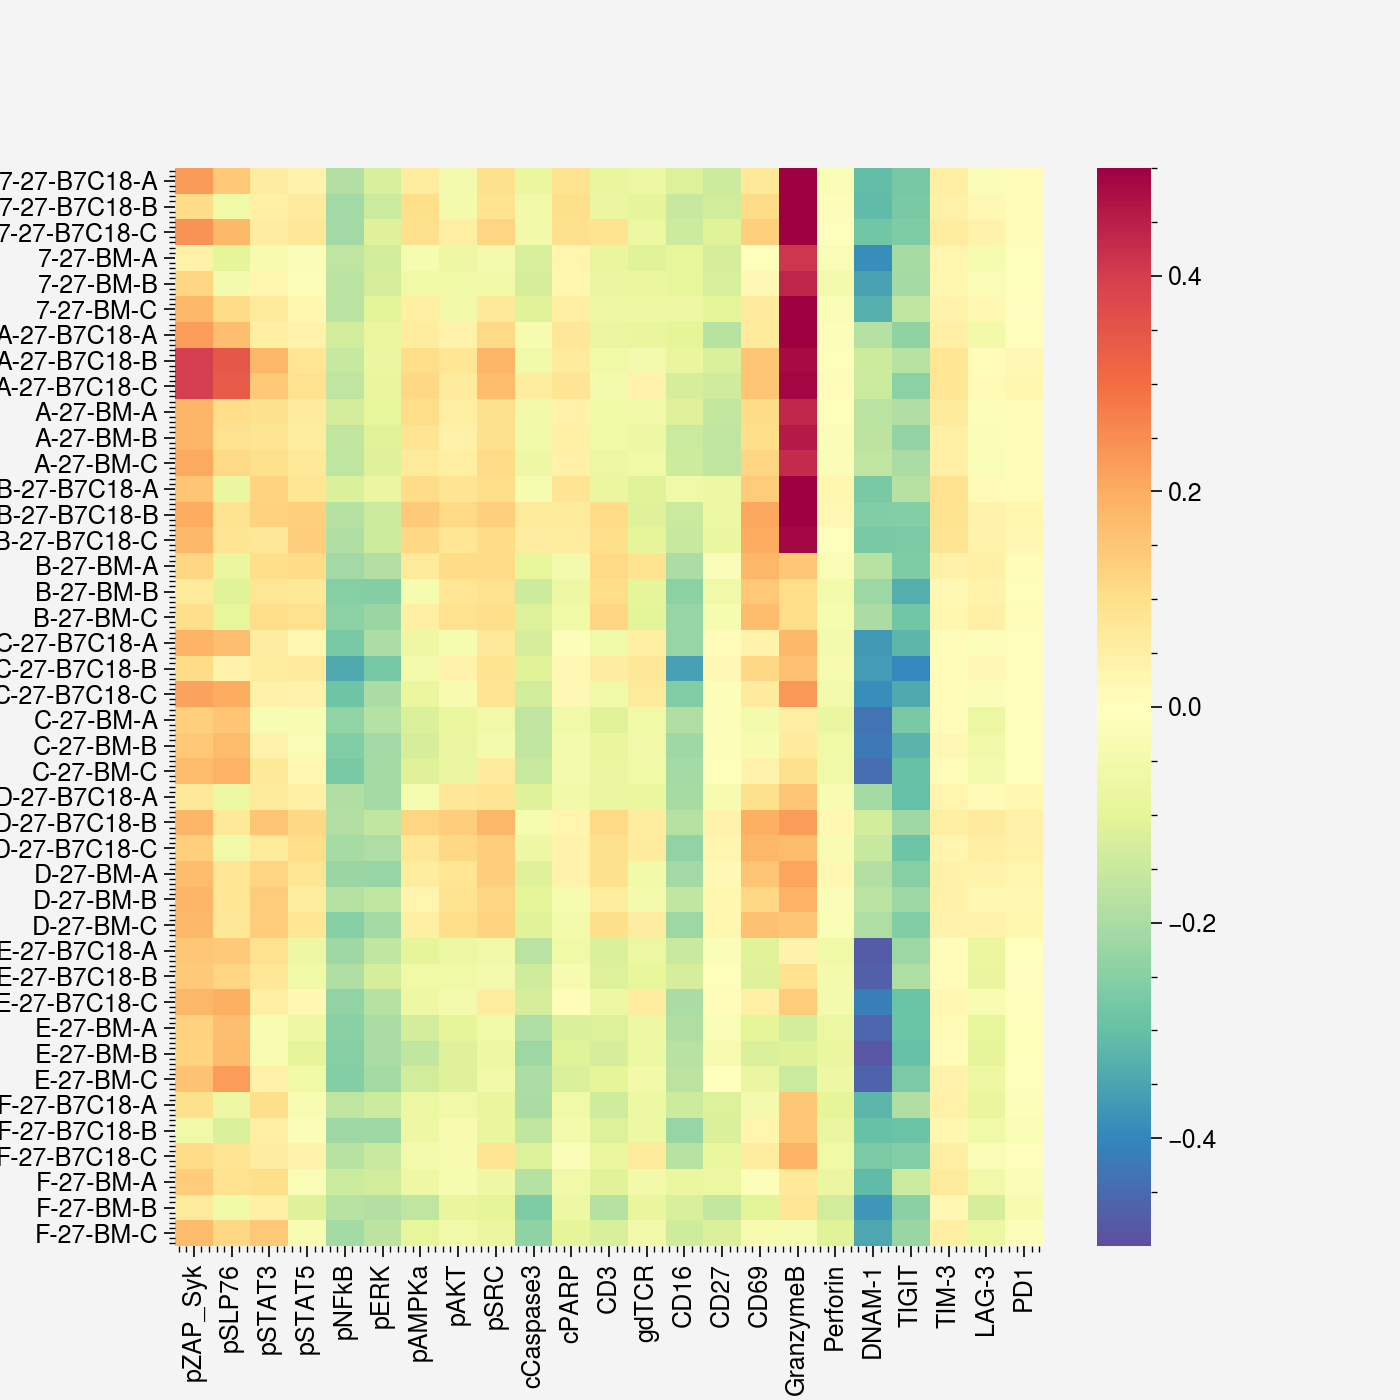

In [26]:
fig, ax = plt.subplots(figsize=(7, 7))
colormap=pplt.Colormap('Spectral_r')
offset = mcolors.TwoSlopeNorm(vmin=-0.5,vcenter=-0,vmax=0.5)
seaborn.heatmap(heatmap_EMD, cmap=colormap, norm=offset,)
plt.show()

In [29]:
#Generation of xEMD scores Figure 2f
data = cocul_meta.drop([    

'GFP'
    ],axis=1, inplace=False)
data.head()

pHH3  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      7        eGFP-stIL15  B7C18     Batch2 20220614 A          0.006308   
                                                                B          0.002828   
                                                                C         -0.008157   
                                      BM        Batch2 20220614 A         -0.003497   
                                                                B         -0.002225   

                                                                           Vimentin  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      7        eGFP-stIL15  B7C18     Batch2 20220614 A          0.019151   
                                                                B          0.012649   
                                                                C         -0.030974   
                                      BM        Batch2 20220614 A         -0.019350   
                                                                B          0.013680   

                                                                              B7C23  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      7        eGFP-stIL15  B7C18     Batch2 20220614 A          0.002605   
                                                                B          0.005827   
                                                                C         -0.007880   
                                      BM        Batch2 20220614 A         -0.008636   
                                                                B          0.008846   

                                                                              B7C18  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      7        eGFP-stIL15  B7C18     Batch2 20220614 A         -0.001773   
                                                                B          0.002611   
                                                                C         -0.001907   
                                      BM        Batch2 20220614 A         -0.007719   
                                                                B          0.005320   

                                                                                IdU  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      7        eGFP-stIL15  B7C18     Batch2 20220614 A          0.050850   
                                                                B          0.020551   
                                                                C         -0.057359   
                                      BM        Batch2 20220614 A         -0.036853   
                                                                B          0.047096   

                                                                              Trail  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      7        eGFP-stIL15  B7C18     Batch2 20220614 A          0.004677   
                                                                B         -0.005268   
                                                                C          0.002814   
                                      BM        Batch2 20220614 A         -0.005123   
                                                                B          0.004328   

                                                                           cCaspase3  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate              
X       gd      7        eGFP-stIL15  B7C18     Batch2 20220614 A           0.020586   
                                                                B          -0.014622   
                                                                C  

In [30]:
data['meanEMD'] = data.abs().mean(axis=1)
data.head()


pHH3  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      7        eGFP-stIL15  B7C18     Batch2 20220614 A          0.006308   
                                                                B          0.002828   
                                                                C         -0.008157   
                                      BM        Batch2 20220614 A         -0.003497   
                                                                B         -0.002225   

                                                                           Vimentin  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      7        eGFP-stIL15  B7C18     Batch2 20220614 A          0.019151   
                                                                B          0.012649   
                                                                C         -0.030974   
                                      BM        Batch2 20220614 A         -0.019350   
                                                                B          0.013680   

                                                                              B7C23  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      7        eGFP-stIL15  B7C18     Batch2 20220614 A          0.002605   
                                                                B          0.005827   
                                                                C         -0.007880   
                                      BM        Batch2 20220614 A         -0.008636   
                                                                B          0.008846   

                                                                              B7C18  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      7        eGFP-stIL15  B7C18     Batch2 20220614 A         -0.001773   
                                                                B          0.002611   
                                                                C         -0.001907   
                                      BM        Batch2 20220614 A         -0.007719   
                                                                B          0.005320   

                                                                                IdU  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      7        eGFP-stIL15  B7C18     Batch2 20220614 A          0.050850   
                                                                B          0.020551   
                                                                C         -0.057359   
                                      BM        Batch2 20220614 A         -0.036853   
                                                                B          0.047096   

                                                                              Trail  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      7        eGFP-stIL15  B7C18     Batch2 20220614 A          0.004677   
                                                                B         -0.005268   
                                                                C          0.002814   
                                      BM        Batch2 20220614 A         -0.005123   
                                                                B          0.004328   

                                                                           cCaspase3  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate              
X       gd      7        eGFP-stIL15  B7C18     Batch2 20220614 A           0.020586   
                                                                B          -0.014622   
                                                                C  

In [31]:
sorted_df = data.sort_values(by="meanEMD", ascending=True)
sorted_df.head()

pHH3  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      A        eGFP-stIL15  BM        Batch2 20220614 A          0.001356   
                7        eGFP-stIL15  BM        Batch2 20220614 C          0.004023   
                E        eGFP-stIL15  BM        Batch2 20220614 C         -0.002016   
                B        eGFP-stIL15  B7C18     Batch2 20220614 A         -0.005867   
                                                                B          0.003116   

                                                                           Vimentin  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      A        eGFP-stIL15  BM        Batch2 20220614 A         -0.023491   
                7        eGFP-stIL15  BM        Batch2 20220614 C          0.008116   
                E        eGFP-stIL15  BM        Batch2 20220614 C          0.015733   
                B        eGFP-stIL15  B7C18     Batch2 20220614 A          0.018525   
                                                                B         -0.014350   

                                                                              B7C23  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      A        eGFP-stIL15  BM        Batch2 20220614 A          0.002431   
                7        eGFP-stIL15  BM        Batch2 20220614 C         -0.004438   
                E        eGFP-stIL15  BM        Batch2 20220614 C          0.001595   
                B        eGFP-stIL15  B7C18     Batch2 20220614 A          0.009754   
                                                                B         -0.002673   

                                                                              B7C18  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      A        eGFP-stIL15  BM        Batch2 20220614 A         -0.003898   
                7        eGFP-stIL15  BM        Batch2 20220614 C          0.002268   
                E        eGFP-stIL15  BM        Batch2 20220614 C         -0.001555   
                B        eGFP-stIL15  B7C18     Batch2 20220614 A          0.001990   
                                                                B          0.003231   

                                                                                IdU  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      A        eGFP-stIL15  BM        Batch2 20220614 A         -0.018856   
                7        eGFP-stIL15  BM        Batch2 20220614 C         -0.017802   
                E        eGFP-stIL15  BM        Batch2 20220614 C         -0.069219   
                B        eGFP-stIL15  B7C18     Batch2 20220614 A         -0.017009   
                                                                B         -0.037032   

                                                                              Trail  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
X       gd      A        eGFP-stIL15  BM        Batch2 20220614 A         -0.001843   
                7        eGFP-stIL15  BM        Batch2 20220614 C          0.001424   
                E        eGFP-stIL15  BM        Batch2 20220614 C         -0.006938   
                B        eGFP-stIL15  B7C18     Batch2 20220614 A         -0.005901   
                                                                B         -0.003720   

                                                                           cCaspase3  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate              
X       gd      A        eGFP-stIL15  BM        Batch2 20220614 A           0.013174   
                7        eGFP-stIL15  BM        Batch2 20220614 C          -0.013431   
                E        eGFP-stIL15  BM        Batch2 20220614 C  

In [32]:
filtered_df = sorted_df.filter(["meanEMD"]).reset_index()
filtered_df_mono = filtered_df.loc[(filtered_df['Culture'].isin(['gd']))]
filtered_df_cocul = filtered_df.loc[(filtered_df['Culture'].isin(['PDOgd']))]
filtered_df_mono.head()

,Patient,Culture,gd_donor,Transduction,Treatment,Batch,Date,Replicate,meanEMD
0,X,gd,A,eGFP-stIL15,BM,Batch2,20220614,A,0.010180
1,X,gd,7,eGFP-stIL15,BM,Batch2,20220614,C,0.011264
2,X,gd,E,eGFP-stIL15,BM,Batch2,20220614,C,0.011279
3,X,gd,B,eGFP-stIL15,B7C18,Batch2,20220614,A,0.011390
4,X,gd,B,eGFP-stIL15,B7C18,Batch2,20220614,B,0.013237


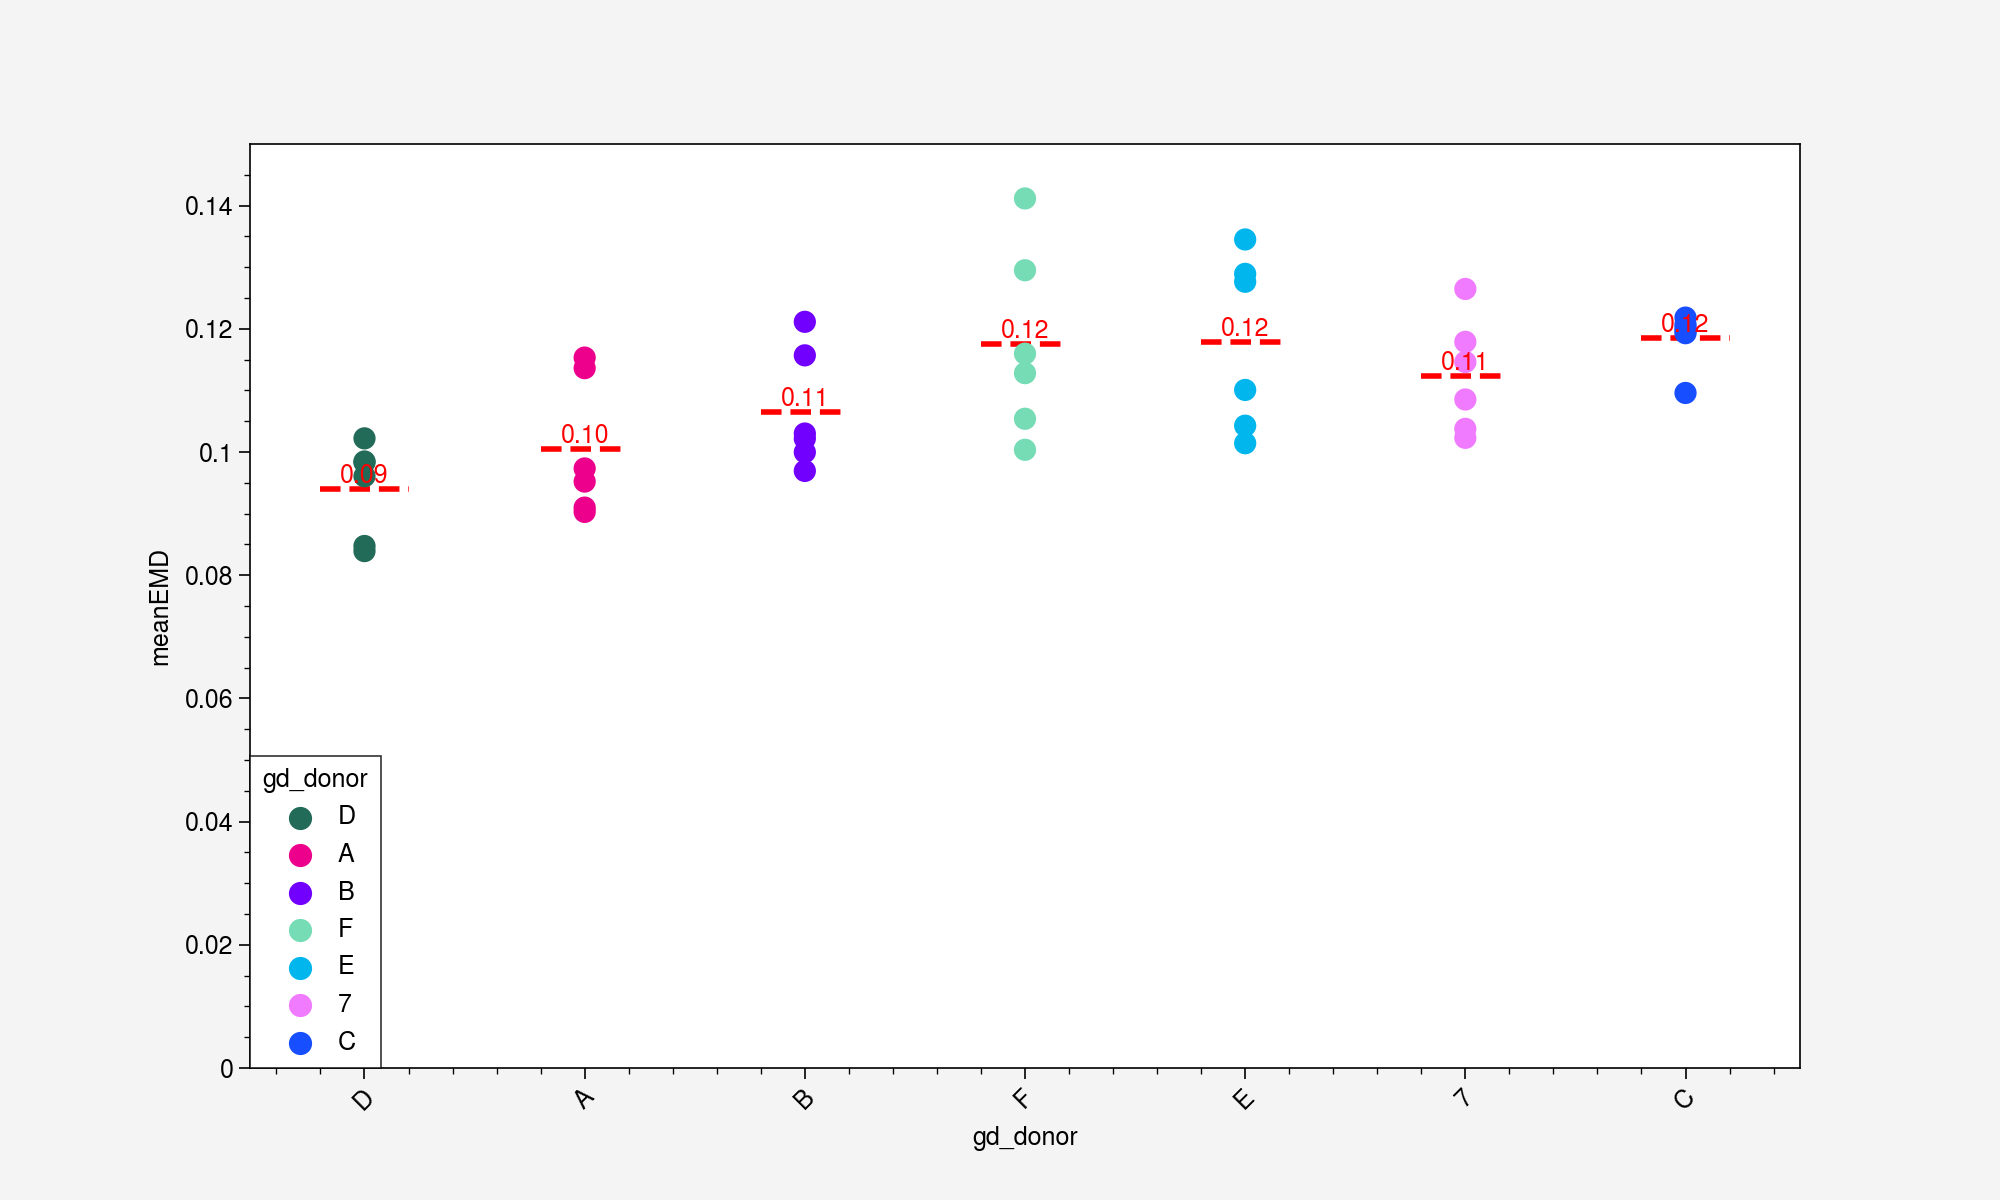

In [ ]:
#xEMD for coculture conditions
import seaborn as sns

donor = {'7':'#F17BFF', 'A':'#EC008C','B':'#7100FF','C':'#174EFF','D':'#236B59','E':'#00B6ED','F':'#76DCB6'}

treatment = {'B7C18':'#000000', 'BM':'none'}

plt.figure(figsize=(10, 6))

sns.stripplot(
    data=filtered_df_cocul,
    x="gd_donor",
    y="meanEMD",
    jitter=False,
    size=8,
    hue="gd_donor",
    palette=donor 
)

plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.ylim(0, 0.15)
for donor_group in filtered_df_cocul['gd_donor'].unique():
    data_subset = filtered_df_cocul[filtered_df_cocul['gd_donor'] == donor_group]
    mean_value = data_subset['meanEMD'].mean()
    donor_index = list(filtered_df_cocul['gd_donor'].unique()).index(donor_group)
    y_coord = mean_value
    plt.hlines(y=y_coord, xmin=donor_index - 0.2, xmax=donor_index + 0.2, color='red', linestyle='--', linewidth=2)
    plt.text(donor_index, y_coord, f'{mean_value:.2f}', color='red', ha='center', va='bottom')
plt.show()

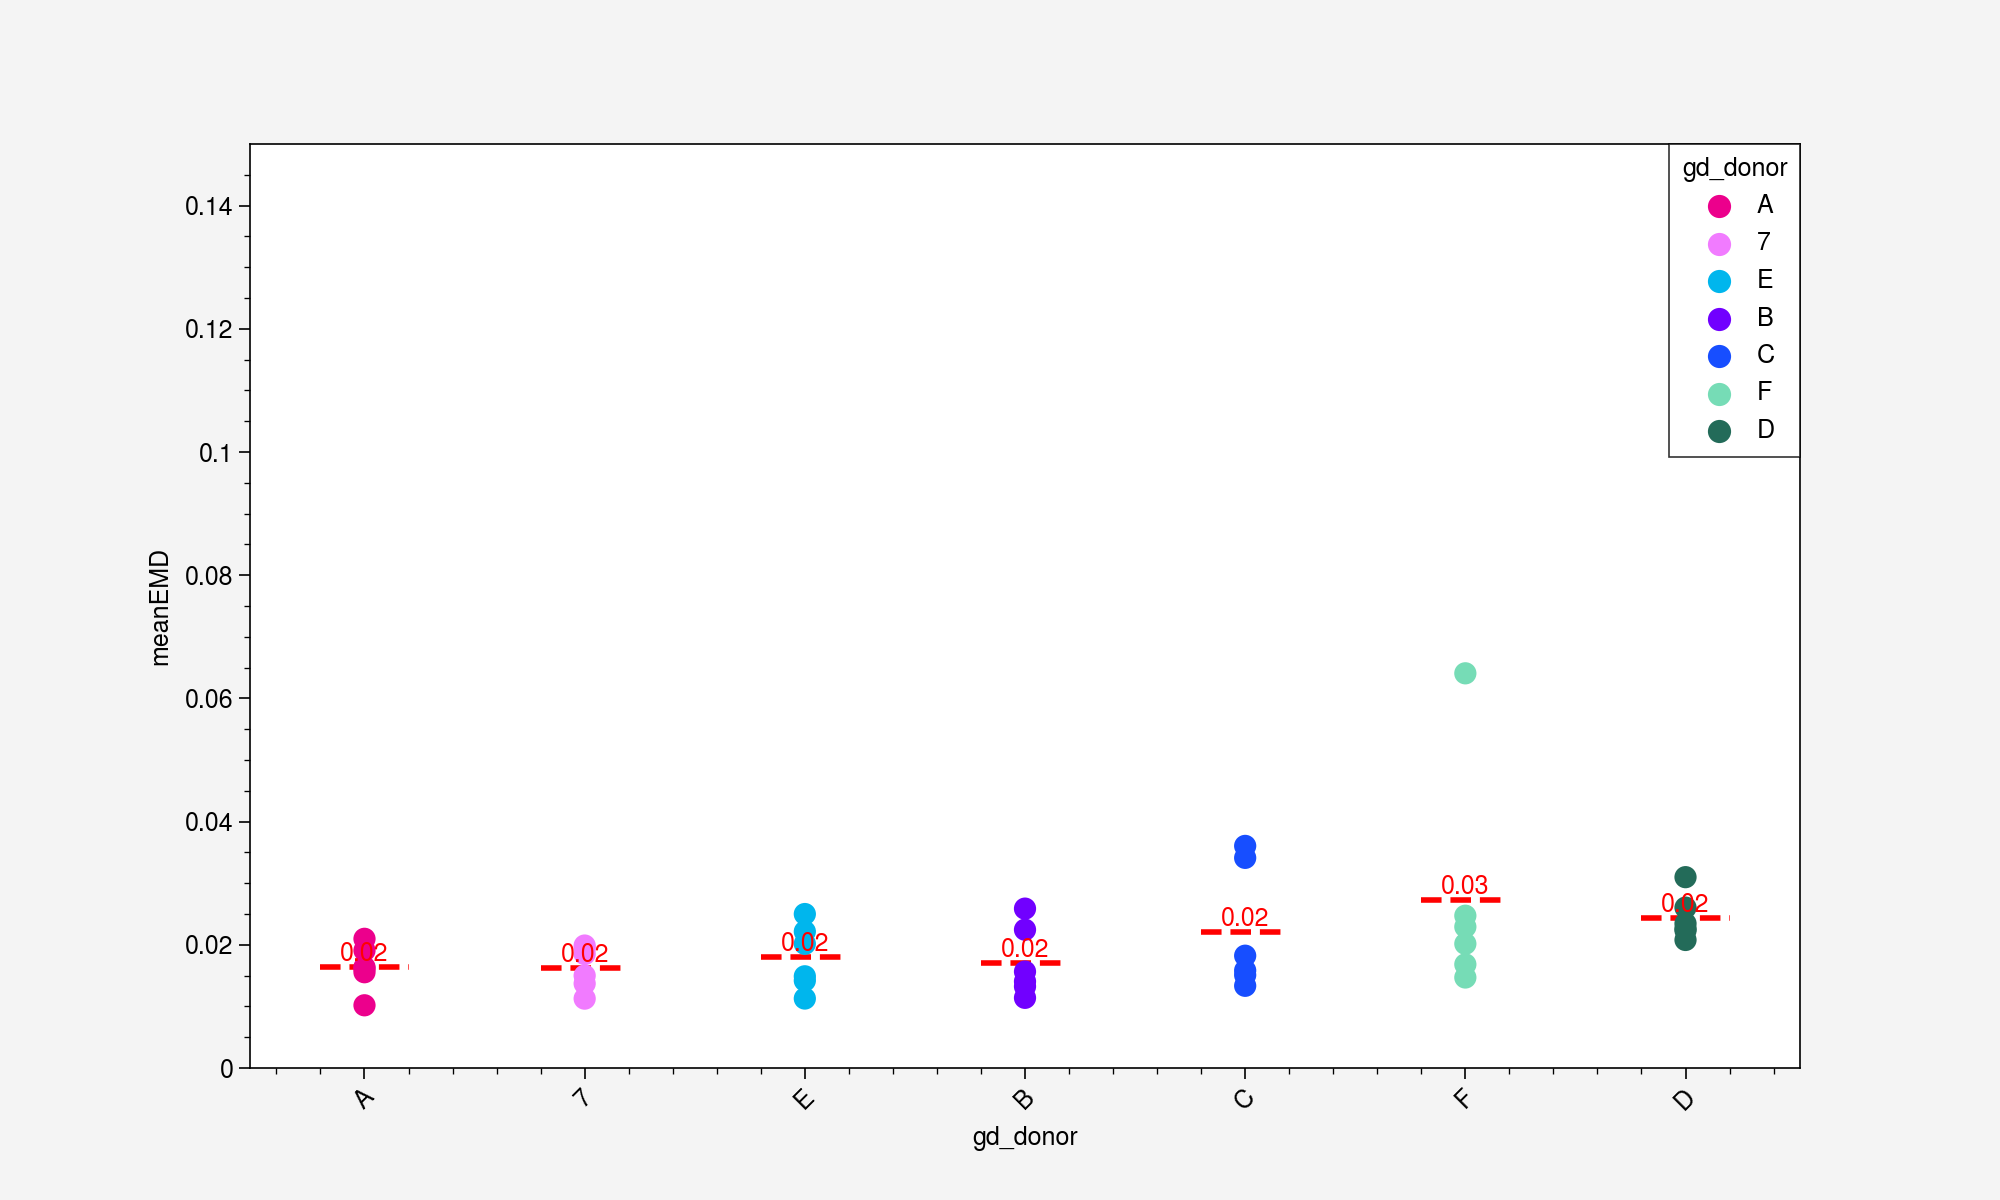

In [34]:
#xEMD for monoculture conditions

import seaborn as sns

donor = {'7':'#F17BFF', 'A':'#EC008C','B':'#7100FF','C':'#174EFF','D':'#236B59','E':'#00B6ED','F':'#76DCB6'}

treatment = {'B7C18':'#000000', 'BM':'none'}

plt.figure(figsize=(10, 6))

sns.stripplot(
    data=filtered_df_mono,
    x="gd_donor",
    y="meanEMD",
    jitter=False, 
    size=8,
    hue="gd_donor",
    palette=donor 
)

plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.ylim(0, 0.15)

for donor_group in filtered_df_mono['gd_donor'].unique():
    data_subset = filtered_df_mono[filtered_df_mono['gd_donor'] == donor_group]
    mean_value = data_subset['meanEMD'].mean()
    donor_index = list(filtered_df_mono['gd_donor'].unique()).index(donor_group)
    y_coord = mean_value
    plt.hlines(y=y_coord, xmin=donor_index - 0.2, xmax=donor_index + 0.2, color='red', linestyle='--', linewidth=2)
    plt.text(donor_index, y_coord, f'{mean_value:.2f}', color='red', ha='center', va='bottom')
plt.show()